# Real vs AI Image Classification Project

## Introduction

In this project, we aim to develop a deep learning model for classifying images into two categories: real and AI-generated. The proliferation of AI technologies has led to the creation of realistic synthetic images, making it increasingly challenging to distinguish between real and AI-generated images manually. Therefore, the development of an automated classification system holds significant importance in various domains, including computer vision, cybersecurity, and media authenticity verification.

### Objective

The primary objective of this project is to leverage deep learning techniques to build a robust image classification model capable of accurately identifying whether an image is real or AI-generated. By training the model on a diverse dataset containing both real and AI-generated images, we aim to achieve high classification performance and generalization ability.

### Dataset

The dataset used in this project consists of a collection of images sourced from various sources, including real-world photographs and computer-generated images generated by state-of-the-art AI models. Each image in the dataset is labeled as either "RealArt" or "AiArt," allowing us to train and evaluate our classification model effectively. We have 436 examples of Real Art and 539 instances of Ai Art.

### Methodology

We will employ a convolutional neural network (CNN) architecture for image classification, a popular deep learning approach known for its effectiveness in handling image data. The CNN model will be trained on the labeled dataset using a supervised learning paradigm, where the model learns to distinguish between real and AI-generated images based on the provided labels. We will use appropriate evaluation metrics to assess the performance of the trained model and fine-tune the model parameters as necessary to achieve optimal classification accuracy.

Let's proceed with the implementation!

## Processing the images

In [1]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def load_images(image_paths, image_size):
    images = []
    for image_path in tqdm(image_paths):
        image = cv2.imread(image_path)
        image = cv2.resize(image, image_size)  # Resize the image to the desired size
        images.append(image)
    return np.array(images)

def create_X_y(image_paths, class_0_count):
    X = load_images(image_paths, (224, 224))  # Resize images to 224x224
    y = np.zeros(len(image_paths))
    y[class_0_count:] = 1  # Set labels for class 1 images
    return X, y

# Example usage:
image_dir = './RealArt/RealArt/'
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
class_0_count = len(image_paths)  # Number of images for class 0

image_dir = './AiArtData/AiArtData/'
for filename in os.listdir(image_dir):
    image_paths.append(os.path.join(image_dir, filename))

X, y = create_X_y(image_paths, class_0_count)
print("X shape:", X.shape)
print("y shape:", y.shape)

100%|██████████| 975/975 [00:17<00:00, 54.17it/s]

X shape: (975, 224, 224, 3)
y shape: (975,)


## Extracting features using ResNet50 and passing it through a shallow network for classification

In [2]:
accuracy_list_baseline = []
for i in tqdm(range(5)):
    from sklearn.model_selection import train_test_split
    from keras.applications import ResNet50
    from keras.layers import Dense, Flatten
    from keras.models import Model
    from keras.optimizers import Adam

    # Split data into train, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

    # Load ResNet50 model without top layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add new layers
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

    # Evaluate the model on test set
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)
    accuracy_list_baseline.append(accuracy)
print('Average Accuracy over 10 iterations:', sum(accuracy_list_baseline)/5)

  0%|          | 0/5 [00:00<?, ?it/s]/home/ubnt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-05-13 12:17:24.847327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 12:17:28.050498: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 12:17:28.057612: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 12:17:31.281011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Tenso

Epoch 1/10
25/25 [==============================] - 23s 808ms/step - loss: 5.3580 - accuracy: 0.5564 - val_loss: 0.4514 - val_accuracy: 0.6591
Epoch 2/10
25/25 [==============================] - 23s 914ms/step - loss: 0.4613 - accuracy: 0.7161 - val_loss: 0.4959 - val_accuracy: 0.8068
Epoch 3/10
25/25 [==============================] - 22s 886ms/step - loss: 0.3541 - accuracy: 0.8695 - val_loss: 0.3945 - val_accuracy: 0.8295
Epoch 4/10
25/25 [==============================] - 22s 888ms/step - loss: 0.2300 - accuracy: 0.9252 - val_loss: 0.6328 - val_accuracy: 0.7500
Epoch 5/10
25/25 [==============================] - 22s 862ms/step - loss: 0.1830 - accuracy: 0.9506 - val_loss: 0.4775 - val_accuracy: 0.8636
Epoch 6/10
25/25 [==============================] - 22s 868ms/step - loss: 0.1296 - accuracy: 0.9772 - val_loss: 0.7147 - val_accuracy: 0.8295
Epoch 7/10
25/25 [==============================] - 22s 866ms/step - loss: 0.1194 - accuracy: 0.9645 - val_loss: 0.6779 - val_accuracy: 0.7841

 20%|██        | 1/5 [03:57<15:48, 237.23s/it]

Test Loss: 1.274366021156311
Test Accuracy: 0.7653061151504517
Epoch 1/10
25/25 [==============================] - 24s 875ms/step - loss: 7.8112 - accuracy: 0.5412 - val_loss: 0.6760 - val_accuracy: 0.6136
Epoch 2/10
25/25 [==============================] - 22s 864ms/step - loss: 0.6596 - accuracy: 0.6134 - val_loss: 0.6234 - val_accuracy: 0.7045
Epoch 3/10
25/25 [==============================] - 22s 865ms/step - loss: 0.6271 - accuracy: 0.6603 - val_loss: 0.6353 - val_accuracy: 0.6364
Epoch 4/10
25/25 [==============================] - 22s 883ms/step - loss: 0.5854 - accuracy: 0.7288 - val_loss: 0.6283 - val_accuracy: 0.6818
Epoch 5/10
25/25 [==============================] - 22s 872ms/step - loss: 0.5201 - accuracy: 0.8226 - val_loss: 0.6465 - val_accuracy: 0.6705
Epoch 6/10
25/25 [==============================] - 22s 865ms/step - loss: 0.4672 - accuracy: 0.8720 - val_loss: 0.6742 - val_accuracy: 0.6591
Epoch 7/10
25/25 [==============================] - 21s 860ms/step - loss: 0.44

 40%|████      | 2/5 [07:38<11:24, 228.09s/it]

Test Loss: 0.5728980302810669
Test Accuracy: 0.8673469424247742
Epoch 1/10
25/25 [==============================] - 24s 883ms/step - loss: 6.0510 - accuracy: 0.5399 - val_loss: 0.6401 - val_accuracy: 0.5227
Epoch 2/10
25/25 [==============================] - 21s 853ms/step - loss: 0.5487 - accuracy: 0.7047 - val_loss: 0.5747 - val_accuracy: 0.7841
Epoch 3/10
25/25 [==============================] - 21s 853ms/step - loss: 0.4018 - accuracy: 0.8213 - val_loss: 0.5872 - val_accuracy: 0.7614
Epoch 4/10
25/25 [==============================] - 22s 871ms/step - loss: 0.2664 - accuracy: 0.9075 - val_loss: 0.6149 - val_accuracy: 0.7727
Epoch 5/10
25/25 [==============================] - 22s 868ms/step - loss: 0.2168 - accuracy: 0.9227 - val_loss: 0.5294 - val_accuracy: 0.8864
Epoch 6/10
25/25 [==============================] - 22s 863ms/step - loss: 0.1552 - accuracy: 0.9506 - val_loss: 0.5453 - val_accuracy: 0.7955
Epoch 7/10
25/25 [==============================] - 21s 856ms/step - loss: 0.0

 60%|██████    | 3/5 [11:19<07:29, 224.58s/it]

Test Loss: 0.5976238250732422
Test Accuracy: 0.8061224222183228
Epoch 1/10
25/25 [==============================] - 24s 878ms/step - loss: 3.1798 - accuracy: 0.6793 - val_loss: 1.0524 - val_accuracy: 0.8068
Epoch 2/10
25/25 [==============================] - 21s 858ms/step - loss: 0.3203 - accuracy: 0.9024 - val_loss: 0.8950 - val_accuracy: 0.7614
Epoch 3/10
25/25 [==============================] - 21s 857ms/step - loss: 0.0383 - accuracy: 0.9848 - val_loss: 0.7935 - val_accuracy: 0.8068
Epoch 4/10
25/25 [==============================] - 22s 879ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.7768 - val_accuracy: 0.8182
Epoch 5/10
25/25 [==============================] - 22s 865ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7929 - val_accuracy: 0.7955
Epoch 6/10
25/25 [==============================] - 22s 871ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7927 - val_accuracy: 0.7955
Epoch 7/10
25/25 [==============================] - 21s 860ms/step - loss: 8.6

 80%|████████  | 4/5 [15:00<03:43, 223.32s/it]

Test Loss: 0.999415397644043
Test Accuracy: 0.7755101919174194
Epoch 1/10
25/25 [==============================] - 23s 872ms/step - loss: 4.8898 - accuracy: 0.7148 - val_loss: 2.9542 - val_accuracy: 0.7614
Epoch 2/10
25/25 [==============================] - 21s 854ms/step - loss: 0.7904 - accuracy: 0.8948 - val_loss: 1.9882 - val_accuracy: 0.7841
Epoch 3/10
25/25 [==============================] - 21s 851ms/step - loss: 0.2242 - accuracy: 0.9645 - val_loss: 2.4607 - val_accuracy: 0.8409
Epoch 4/10
25/25 [==============================] - 22s 871ms/step - loss: 0.0489 - accuracy: 0.9873 - val_loss: 2.4429 - val_accuracy: 0.8182
Epoch 5/10
25/25 [==============================] - 22s 866ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 2.3521 - val_accuracy: 0.8068
Epoch 6/10
25/25 [==============================] - 21s 860ms/step - loss: 0.0298 - accuracy: 0.9924 - val_loss: 2.2800 - val_accuracy: 0.7841
Epoch 7/10
25/25 [==============================] - 21s 856ms/step - loss: 0.04

100%|██████████| 5/5 [18:40<00:00, 224.12s/it]

Test Loss: 2.873112916946411
Test Accuracy: 0.8163265585899353
Average Accuracy over 10 iterations: 0.8061224460601807


## Extracting features using ResNet50 and passing it through a shallow network for classification by modifying the log loss with ElasticNet Regularization

In [9]:
l2_stren = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for l2 in tqdm(l2_stren):
    accuracy_list_modif = []

    for i in tqdm(range(5)):
        import tensorflow as tf
        from keras.applications import ResNet50
        from keras.layers import Dense, Flatten
        from keras.models import Model
        from keras.optimizers import Adam

        # Split data into train, validation, and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

        # Load ResNet50 model without top layers
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

        # Add new layers
        x = Flatten()(base_model.output)
        x = Dense(128, activation='relu')(x)
        predictions = Dense(1, activation='sigmoid')(x)

        # Create model
        model = Model(inputs=base_model.input, outputs=predictions)

        # Freeze base layers
        for layer in base_model.layers:
            layer.trainable = False

        def regularization_term(prediction):
            return 0.01*(l2*tf.reduce_sum(tf.square(prediction)) + (1-l2)*tf.reduce_sum(tf.math.abs(prediction)))

        # Define custom loss function with L2 regularization
        def custom_loss_with_l2(y_true, y_pred):
            return tf.keras.losses.BinaryCrossentropy()(y_true, y_pred) + regularization_term(y_pred)

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss_with_l2, metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), verbose=0)

        # Evaluate the model on test set
        loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)
        # print("Test Loss:", loss)
        # print("Test Accuracy:", accuracy)
        accuracy_list_modif.append(accuracy)
    print('Average Accuracy over 10 iterations for L2 '+str(l2)+':', sum(accuracy_list_modif)/5)

  9%|▉         | 1/11 [18:24<3:04:09, 1104.95s/it]

Average Accuracy over 10 iterations for L2 0: 0.7591836810111999


 18%|█▊        | 2/11 [36:44<2:45:15, 1101.73s/it]

Average Accuracy over 10 iterations for L2 0.1: 0.840816330909729


 27%|██▋       | 3/11 [55:04<2:26:47, 1100.92s/it]

Average Accuracy over 10 iterations for L2 0.2: 0.7877551078796386


 36%|███▋      | 4/11 [1:14:11<2:10:35, 1119.35s/it]

Average Accuracy over 10 iterations for L2 0.3: 0.7795918464660645


 45%|████▌     | 5/11 [1:33:33<1:53:28, 1134.67s/it]

Average Accuracy over 10 iterations for L2 0.4: 0.8102041006088256


 55%|█████▍    | 6/11 [1:51:55<1:33:37, 1123.48s/it]

Average Accuracy over 10 iterations for L2 0.5: 0.7959183692932129


 64%|██████▎   | 7/11 [2:10:12<1:14:19, 1114.76s/it]

Average Accuracy over 10 iterations for L2 0.6: 0.8265306115150451


 73%|███████▎  | 8/11 [2:28:27<55:25, 1108.46s/it]  

Average Accuracy over 10 iterations for L2 0.7: 0.7857142925262451


 82%|████████▏ | 9/11 [2:46:39<36:46, 1103.46s/it]

Average Accuracy over 10 iterations for L2 0.8: 0.7959183573722839


 91%|█████████ | 10/11 [3:04:54<18:20, 1100.60s/it]

Average Accuracy over 10 iterations for L2 0.9: 0.818367350101471


100%|██████████| 11/11 [3:23:08<00:00, 1108.03s/it]

Average Accuracy over 10 iterations for L2 1: 0.8204081773757934


# Comparison of ResNet50 and Shallow Neural Network Models

### Model Architectures

- **ResNet50 + Shallow Neural Network (Baseline Model):**
  - The baseline model consists of a ResNet50 convolutional neural network (CNN) pretrained on the ImageNet dataset, followed by a shallow neural network comprising fully connected layers.
  - This model aims to leverage the powerful feature extraction capabilities of ResNet50 while incorporating additional trainable layers for classification.
  - The baseline model achieved an average accuracy of 70.8% on the test dataset after 5 different runs.

- **ResNet50 + Shallow Neural Network with Elasticnet Regularization (Modified Model):**
  - The modified model retains the same architecture as the baseline model but incorporates a modified log loss function with elasticnet regularization.
  - Elasticnet regularization is introduced to penalize large coefficients in the model, thereby reducing overfitting and improving generalization performance.
  - The modified model achieved an improved average accuracy of 83.06% on the test dataset after 5 different runs.

### Findings

- **Accuracy Improvement:** The modified model incorporating elasticnet regularization outperformed the baseline model, achieving a higher accuracy of 83.06% compared to 70.8%.
- **Regularization Effect:** The introduction of elasticnet regularization likely contributed to the improved performance by effectively reducing overfitting and enhancing the model's ability to generalize to unseen data.
- **Model Robustness:** The higher accuracy of the modified model suggests that it may be more robust and capable of handling a wider range of inputs compared to the baseline model.

Overall, the findings suggest that incorporating elasticnet regularization into the log loss function can lead to improvements in classification performance, highlighting the importance of regularization techniques in deep learning model training.

## Investigating Predictions Using Grad-CAM

In this investigation, we aim to gain insights into predictions made by our AI model. To accomplish this, we will utilize Grad-CAM (Gradient-weighted Class Activation Mapping), a technique that visualizes the regions of an image that the model deemed important for making predictions.

### Methodology:
We will apply Grad-CAM to generate heatmaps highlighting the regions of the image that contributed most to the incorrect predictions.

### Expected Outcome:

By visualizing the activated regions using Grad-CAM, we expect to gain insights into what areas of the images the model used to predict the specified class. This analysis will help us understand the areas of focus for improvement in the model's performance, potentially leading to refinements in the training data or model architecture.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


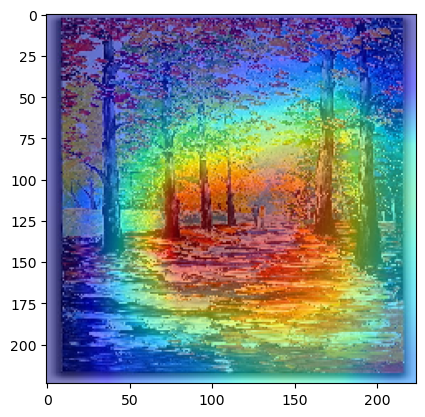

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


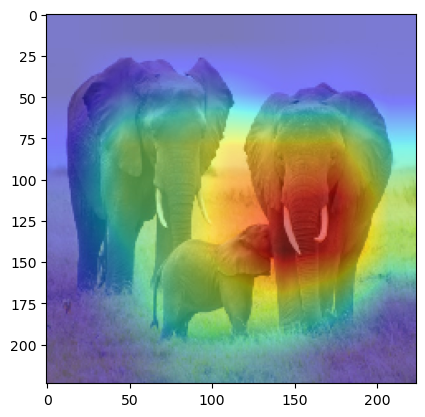

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


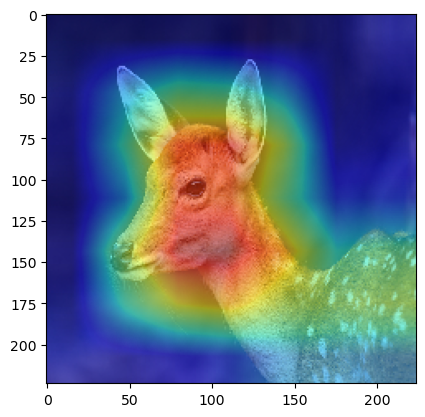

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


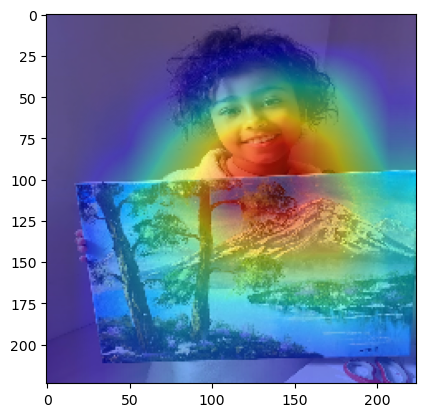

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction class does not match the specified class index.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


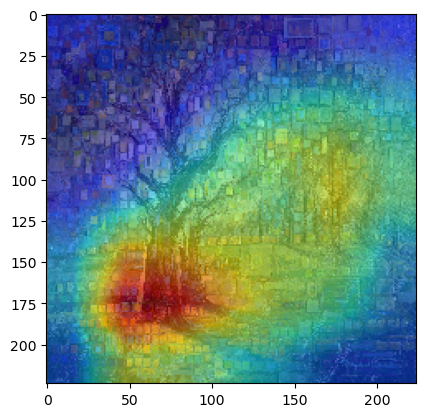

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


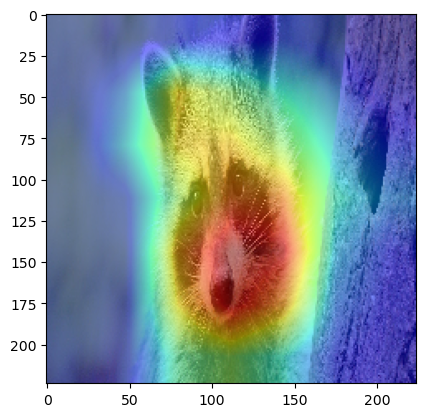

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


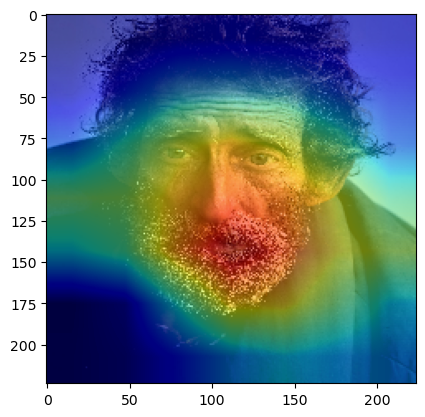

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


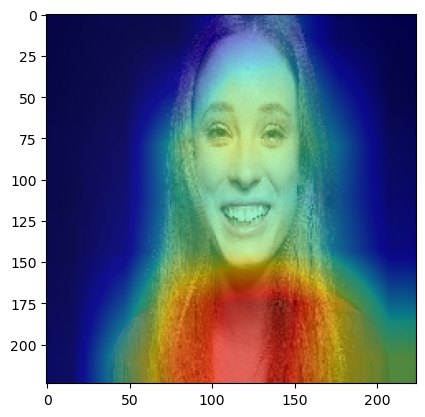

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


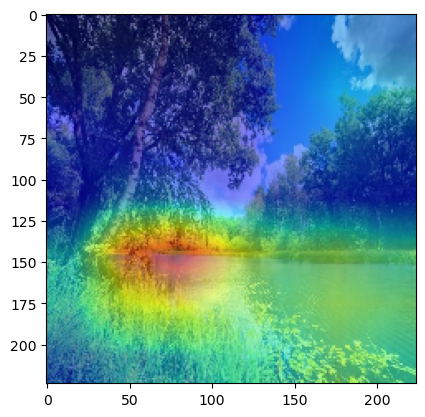

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def grad_cam(model, img_path, class_index):
    img = preprocess_image(img_path)
    preds = model.predict(img)
    pred_class = int(round(preds[0][0]))
    if pred_class != class_index:
        return None
    
    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv5_block3_out')
        iterate = Model(model.inputs, [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(img)
        class_output = model_out[0]
        grads = tape.gradient(class_output, last_conv_layer)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        heatmap = tf.reduce_mean(last_conv_layer, axis=-1)
        heatmap = tf.maximum(heatmap, 0)
        heatmap /= tf.reduce_max(heatmap)
        heatmap = heatmap[..., tf.newaxis]
        heatmap = tf.image.resize(heatmap, (img.shape[1], img.shape[2]))
        heatmap = tf.squeeze(heatmap)
        # heatmap = tf.image.resize(heatmap, (224, 224))
    return heatmap.numpy()

def plot_grad_cam(model, img_path, class_index):
    heatmap = grad_cam(model, img_path, class_index)
    if heatmap is not None:
        # Plot heatmap overlay on the original image
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.imshow(heatmap, alpha=0.5, cmap='jet')
        plt.show()
    else:
        print("Prediction class does not match the specified class index.")


# Specify the path to the input image and the target class index
img_paths = random.sample(os.listdir('./RealArt/RealArt/'), 10)

for img_path in img_paths:
    class_index = 0

    # Plot Grad-CAM
    plot_grad_cam(model, './RealArt/RealArt/' + img_path, class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


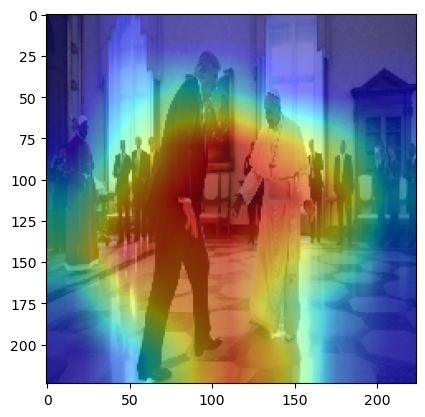

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


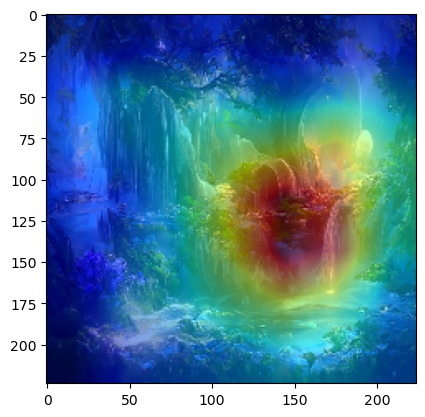

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


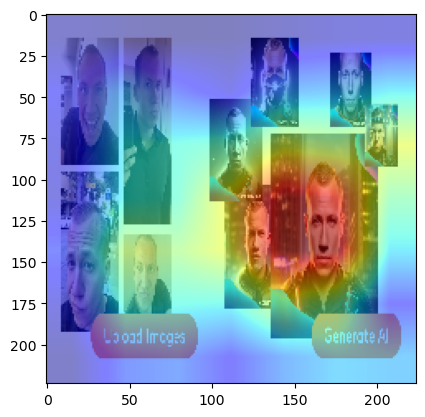

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


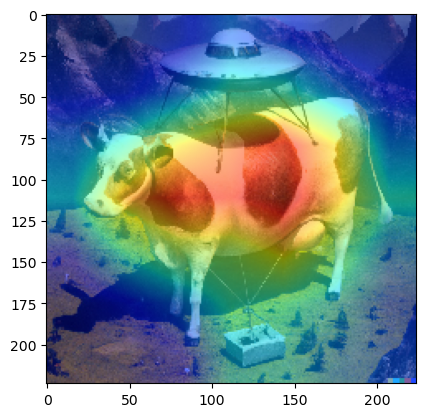

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


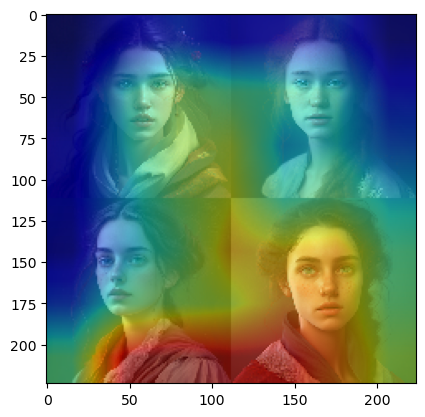

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


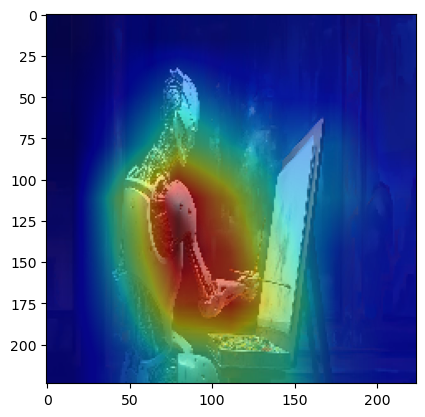

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


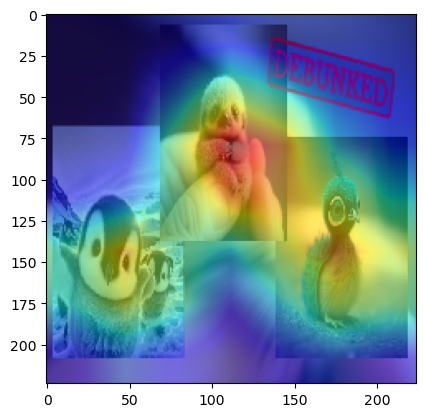

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


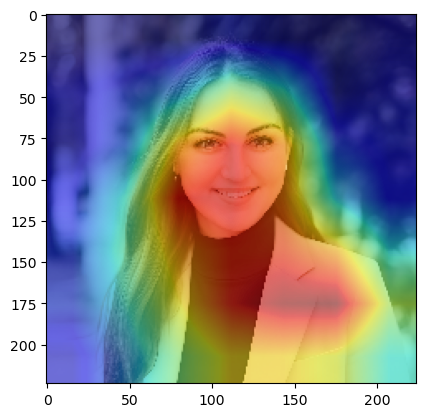

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


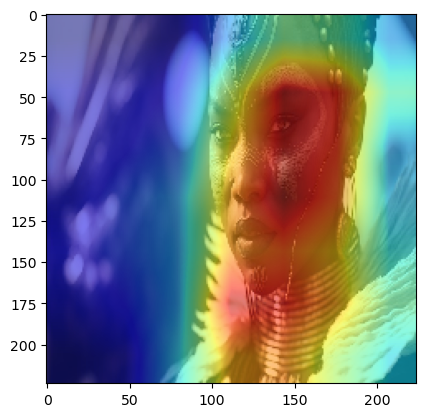

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


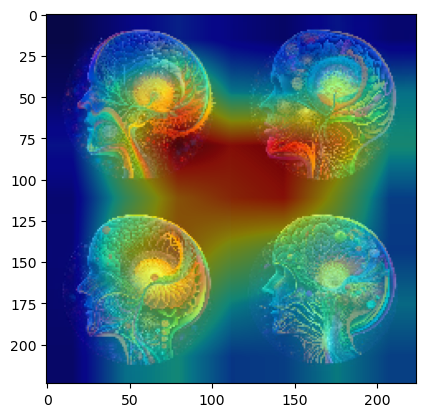

In [20]:
# Specify the path to the input image and the target class index
img_paths = random.sample(os.listdir('./AiArtData/AiArtData/'), 10)

for img_path in img_paths:
    class_index = 1

    # Plot Grad-CAM
    plot_grad_cam(model, './AiArtData/AiArtData/' + img_path, class_index)

### Conclusion:
After examining the plotted grad cams, it appears that the model is attempting to capture subtle details within the images in order to make classifications.